<a href="https://colab.research.google.com/github/juliosoterooo/Extracci-n-de-datos/blob/main/Act%203.4%20Extracci%C3%B3n%20de%20Caracter%C3%ADsticas/MEXICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Instalamos librebria para analisis de variables categoricas
%pip install funpymodeling

In [8]:
#Importamos las librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
from google.colab import files
files.upload()

In [10]:
city= pd.read_csv('datos_limpios_iqr.csv')
city.head()

,Unnamed: 0,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,Marco,2013-01-21,"Mexico City, Mexico",within an hour,t,Roma Norte,"['email', 'phone']",t,t,...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,1,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,f,Roma Norte,"['email', 'phone', 'work_email']",t,t,...,0.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,1.0,0.41
2,2,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,t,Condesa,"['email', 'phone', 'work_email']",t,t,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42
3,3,Martina,2013-01-09,"Mexico City, Mexico",within an hour,t,Condesa,"['email', 'phone']",t,t,...,6.0,4.75,4.83,4.72,4.84,4.93,4.90,4.75,1.0,1.19
4,4,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,t,Hipódromo,"['email', 'phone']",t,t,...,4.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.32


In [11]:
city.drop('Unnamed: 0', axis=1, inplace=True)
city.head()

,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,Marco,2013-01-21,"Mexico City, Mexico",within an hour,t,Roma Norte,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,f,Roma Norte,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",...,0.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,1.0,0.41
2,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,t,Condesa,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42
3,Martina,2013-01-09,"Mexico City, Mexico",within an hour,t,Condesa,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",...,6.0,4.75,4.83,4.72,4.84,4.93,4.90,4.75,1.0,1.19
4,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,t,Hipódromo,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",...,4.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.32


In [12]:
#comprobamos que nuestra base este limpia, pues previamente realizamos
#metodos para reemplazar datos nulos y eliminación de outliers
city.isnull().sum().sum()

0

**categorizar variables númericas**
” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month”

**host_response_rate**

In [13]:
x='host_response_rate'
#Calculamos el numero total de la poblacion "n"
city[x].info()
n1=len(city)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city[x].max()
min=city[x].min()
limites= [min, max]
#Calculamos el Rango R
r=max-min
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(max)
#Calculamos el Ancho del Intervalo "i"
i=r/ni

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [14]:
limites

[1.0, 1.0]

In [15]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,max,round(ni+2))
len(intervalos)

3

In [16]:
#Creamos las categorias
categorias = [
    'Buena', 'Mala'
]


In [17]:
#Finalmente creamos las categorias en la columna numerica
city['host_response_rate']=pd.cut(x=city['host_response_rate'],bins=intervalos,labels=categorias)
city['host_response_rate'].head()

,host_response_rate
0,Mala
1,Mala
2,Mala
3,Mala
4,Mala


In [18]:
city['host_response_rate'].isnull().sum()

0

**host_acceptance_rate**

In [19]:
x='host_acceptance_rate'
#Calculamos el numero total de la poblacion "n"
city[x].info()
n1=len(city)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city[x].max()
min=city[x].min()
limites= [min, max]
#Calculamos el Rango R
r=max-min
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(max)
#Calculamos el Ancho del Intervalo "i"
i=r/ni

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [20]:
limites

[0.85, 1.0]

In [21]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,max,round(ni+2))
len(intervalos)

3

In [22]:
#Creamos las categorias
categorias = [
    'Buena', 'Mala'
]


In [23]:
city['host_acceptance_rate']=pd.cut(x=city['host_acceptance_rate'],bins=intervalos,labels=categorias)
city['host_acceptance_rate'].head()

,host_acceptance_rate
0,Mala
1,Mala
2,Mala
3,Mala
4,Mala


In [24]:
city['host_acceptance_rate'].isnull().sum()

0

**host_total_listings_count**

In [25]:
x='host_total_listings_count'
#Calculamos el numero total de la poblacion "n"
city[x].info()
n1=len(city)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city[x].max()
min=city[x].min()
limites= [min, max]
#Calculamos el Rango R
r=max-min
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(max)
#Calculamos el Ancho del Intervalo "i"
i=r/ni

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [26]:
limites

[1.0, 39.0]

In [27]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,max,round(ni+2))
len(intervalos)

8

In [28]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro','Available'
]

In [29]:
city['host_total_listings_count']=pd.cut(x=city['host_total_listings_count'],bins=intervalos,labels=categorias)
city['host_total_listings_count'].head()

,host_total_listings_count
0,Poco disponible
1,Disponible
2,Escaso
3,Disponible
4,Disponible


In [30]:
city['host_total_listings_count'].isnull().sum()

0

**accommodates**

In [31]:
x='accommodates'
#Calculamos el numero total de la poblacion "n"
city[x].info()
n1=len(city)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city[x].max()
min=city[x].min()
limites= [min, max]
#Calculamos el Rango R
r=max-min
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(max)
#Calculamos el Ancho del Intervalo "i"
i=r/ni

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [32]:
limites

[1.0, 7.0]

In [33]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,max,round(ni+2))
len(intervalos)

6

In [34]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente'
]

In [35]:
city['accommodates']=pd.cut(x=city['accommodates'],bins=intervalos,labels=categorias)
city['accommodates'].head()

,accommodates
0,Poco disponible
1,Poco disponible
2,Abundante
3,Abundante
4,Abundante


In [36]:
city['accommodates'].isnull().sum()

0

**bathrooms_text**

In [37]:
x='bathrooms'
#Calculamos el numero total de la poblacion "n"
city[x].info()
n1=len(city)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city[x].max()
min=city[x].min()
limites= [min, max]
#Calculamos el Rango R
r=max-min
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(max)
#Calculamos el Ancho del Intervalo "i"
i=r/ni

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: bathrooms
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [38]:
limites

[0.0, 3.5]

In [39]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,max,round(ni+2))
len(intervalos)

5

In [40]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso'
]

In [41]:
city['bathrooms']=pd.cut(x=city['bathrooms'],bins=intervalos,labels=categorias)
city['bathrooms'].head()

,bathrooms
0,Poco disponible
1,Poco disponible
2,Poco disponible
3,Poco disponible
4,Poco disponible


In [42]:
city['bathrooms'].isnull().sum()

0

**beds**

In [43]:
x='beds'
#Calculamos el numero total de la poblacion "n"
city[x].info()
n1=len(city)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city[x].max()
min=city[x].min()
limites= [min, max]
#Calculamos el Rango R
r=max-min
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(max)
#Calculamos el Ancho del Intervalo "i"
i=r/ni

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [44]:
limites

[0.0, 3.0]

In [45]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,max,round(ni+2))
len(intervalos)

5

In [46]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso'
]

In [47]:
city['beds']=pd.cut(x=city['beds'],bins=intervalos,labels=categorias)
city['beds'].head()

,beds
0,Abundante
1,Poco disponible
2,Abundante
3,Escaso
4,Abundante


In [48]:
city['beds'].isnull().sum()

0

**price**

In [49]:
x='price'
#Calculamos el numero total de la poblacion "n"
city[x].info()
n1=len(city)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city[x].max()
min=city[x].min()
limites= [min, max]
#Calculamos el Rango R
r=max-min
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(max)
#Calculamos el Ancho del Intervalo "i"
i=r/ni

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: price
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [50]:
limites

[105.0, 2971.0]

In [51]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,max,round(ni+2))
len(intervalos)

15

In [52]:
#Creamos las categorias
categorias = [
    '0-94', '95-189', '200-283', '284-378', '379-473','474-567','568-662','663-757','758-852','853-946','947-1041','1042-1136','1290-1350','1380-1490'
]

In [53]:
city['price']=pd.cut(x=city['price'],bins=intervalos,labels=categorias)
city['price'].head()

,price
0,663-757
1,379-473
2,379-473
3,284-378
4,853-946


In [54]:
city['price'].isnull().sum()

0

**availability_60**

In [55]:
#Calculamos el numero total de la poblacion "n"
city['availability_60'].astype(np.float64).info()
n=len(city)

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: availability_60
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [56]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city['availability_60'].max()
min=city['availability_60'].min()
limites= [min, max]
limites

[0, 60]

In [57]:
#Calculamos el Rango R
r=max-min
r

60

In [58]:
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(max)
ni

6.903462151273697

In [59]:
#Calculamos el Ancho del Intervalo "i"
i=r/ni
i

8.691291222467255

In [60]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,max,round(ni+1))
intervalos

array([-1.00000000e-10,  8.57142857e+00,  1.71428571e+01,  2.57142857e+01,
        3.42857143e+01,  4.28571429e+01,  5.14285714e+01,  6.00000000e+01])

In [61]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro','Comun'
]



In [62]:
#Finalmente creamos las categorias en la columna numerica
city['availability_60']=pd.cut(x=city['availability_60'],bins=intervalos,labels=categorias)
city['availability_60'].head()

,availability_60
0,Disponible
1,Comun
2,Comun
3,Abundante
4,Comun


In [63]:
city['availability_60'].isnull().sum()

0

**availability_90**

In [64]:
#Calculamos el numero total de la poblacion "n"
city['availability_90'].info()
n=len(city)

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: availability_90
Non-Null Count  Dtype
--------------  -----
26536 non-null  int64
dtypes: int64(1)
memory usage: 207.4 KB


In [65]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city['availability_90'].max()
min=city['availability_90'].min()
limites= [min, max]
limites

[0, 90]

In [66]:
#Calculamos el Rango R
r=max-min
r

90

In [67]:
#Categorización de variables
intervalos=np.linspace(-0.01,max,round(ni+1))
len(intervalos)

8

In [68]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro', 'Común'
]


In [69]:
#Finalmente creamos las categorias en la columna numerica
city['availability_90']=pd.cut(x=city['availability_90'],bins=intervalos,labels=categorias)
city['availability_90']

,availability_90
0,Poco disponible
1,Común
2,Común
3,Abundante
4,Común
...,...
26531,Común
26532,Común
26533,Común
26534,Raro


In [70]:
city['availability_90'].isnull().sum()

0

**availability_365**

In [71]:
#Calculamos el numero total de la poblacion "n"
city['availability_365'].info()
n=len(city)

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
26536 non-null  int64
dtypes: int64(1)
memory usage: 207.4 KB


In [72]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city['availability_365'].max()
min=city['availability_365'].min()
limites= [min, max]
limites

[0, 365]

In [73]:
#Calculamos el Rango R
r=max-min
r

365

In [74]:
#Categorización de variables
intervalos=np.linspace(-0.01,max,round(ni+1))
intervalos

array([-1.00000000e-02,  5.21342857e+01,  1.04278571e+02,  1.56422857e+02,
        2.08567143e+02,  2.60711429e+02,  3.12855714e+02,  3.65000000e+02])

In [75]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro', 'Común'
]


In [76]:
#Finalmente creamos las categorias en la columna numerica
city['availability_365']=pd.cut(x=city['availability_365'],bins=intervalos,labels=categorias)
city['availability_365']

,availability_365
0,Raro
1,Común
2,Común
3,Frecuente
4,Común
...,...
26531,Común
26532,Común
26533,Común
26534,Frecuente


In [77]:
city['availability_365'].isnull().sum()

0

**number_of_reviews_ltm**

In [78]:
#Calculamos el numero total de la poblacion "n"
city['number_of_reviews_ltm'].info()
n=len(city)

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: number_of_reviews_ltm
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [79]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city['number_of_reviews_ltm'].max()
min=city['number_of_reviews_ltm'].min()
limites= [min, max]
limites

[0.0, 50.0]

In [80]:
#Calculamos el Rango R
r=max-min
r

50.0

In [81]:
#Categorización de variables
intervalos=np.linspace(-0.01,max,round(ni))
intervalos

array([-1.0000e-02,  8.3250e+00,  1.6660e+01,  2.4995e+01,  3.3330e+01,
        4.1665e+01,  5.0000e+01])

In [82]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro'
]

In [83]:
#Finalmente creamos las categorias en la columna numerica
city['number_of_reviews_ltm']=pd.cut(x=city['number_of_reviews_ltm'],bins=intervalos,labels=categorias)
city['number_of_reviews_ltm']

,number_of_reviews_ltm
0,Disponible
1,Disponible
2,Disponible
3,Disponible
4,Disponible
...,...
26531,Disponible
26532,Disponible
26533,Disponible
26534,Disponible


In [84]:
city['number_of_reviews_ltm'].isnull().sum()

0

**reviews_per_month**

In [85]:
#Calculamos el numero total de la poblacion "n"
city['reviews_per_month'].info()
n=len(city)

<class 'pandas.core.series.Series'>
RangeIndex: 26536 entries, 0 to 26535
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
26536 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [86]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
max=city['reviews_per_month'].max()
min=city['reviews_per_month'].min()
limites= [min, max]
limites

[0.01, 5.34]

In [87]:
#Calculamos el Rango R
r=max-min
r

5.33

In [88]:
#Categorización de variables
intervalos=np.linspace(-0.0000000000001,max,round(ni))
intervalos

array([-1.00e-13,  8.90e-01,  1.78e+00,  2.67e+00,  3.56e+00,  4.45e+00,
        5.34e+00])

In [89]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro'
]


In [90]:
#Finalmente creamos las categorias en la columna numerica
city['reviews_per_month']=pd.cut(x=city['reviews_per_month'],bins=intervalos,labels=categorias)
city['reviews_per_month']

,reviews_per_month
0,Disponible
1,Disponible
2,Disponible
3,Poco disponible
4,Disponible
...,...
26531,Poco disponible
26532,Poco disponible
26533,Poco disponible
26534,Poco disponible


In [91]:
city['reviews_per_month'].isnull().sum()

0

**Modelo explicativo de variables categóricas**

In [92]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_name                       26536 non-null  object  
 1   host_since                      26536 non-null  object  
 2   host_location                   26536 non-null  object  
 3   host_response_time              26536 non-null  object  
 4   host_is_superhost               26536 non-null  object  
 5   host_neighbourhood              26536 non-null  object  
 6   host_verifications              26536 non-null  object  
 7   host_has_profile_pic            26536 non-null  object  
 8   host_identity_verified          26536 non-null  object  
 9   neighbourhood                   26536 non-null  object  
 10  neighbourhood_cleansed          26536 non-null  object  
 11  property_type                   26536 non-null  object  
 12  room_type         

creación de un df con variables categóricas

In [93]:
categoricas = city.select_dtypes(include='category')
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   host_response_rate         26536 non-null  category
 1   host_acceptance_rate       26536 non-null  category
 2   host_total_listings_count  26536 non-null  category
 3   accommodates               26536 non-null  category
 4   bathrooms                  26536 non-null  category
 5   beds                       26536 non-null  category
 6   price                      26536 non-null  category
 7   availability_60            26536 non-null  category
 8   availability_90            26536 non-null  category
 9   availability_365           26536 non-null  category
 10  number_of_reviews_ltm      26536 non-null  category
 11  reviews_per_month          26536 non-null  category
dtypes: category(12)
memory usage: 314.4 KB


In [94]:
#Obtenemos un analisis univariado de las variables categoricas
freq_tbl(categoricas)

  host_response_rate  frequency  percentage  cumulative_perc
0               Mala      26536         1.0              1.0
1              Buena          0         0.0              1.0

----------------------------------------------------------------

  host_acceptance_rate  frequency  percentage  cumulative_perc
0                 Mala      26536         1.0              1.0
1                Buena          0         0.0              1.0

----------------------------------------------------------------

  host_total_listings_count  frequency  percentage  cumulative_perc
0                Disponible      13803    0.520161         0.520161
1           Poco disponible       8159    0.307469         0.827630
2                 Abundante       1732    0.065270         0.892900
3                    Escaso       1218    0.045900         0.938800
4                 Frecuente        744    0.028037         0.966838
5                      Raro        524    0.019747         0.986584
6                 

In [95]:
#Obtengo un analisis univariado de una variable categorica en especifico
table1= freq_tbl(categoricas['price'])
table1

,price,frequency,percentage,cumulative_perc
0,379-473,5768,0.217365,0.217365
1,200-283,3887,0.146480,0.363845
2,284-378,3587,0.135175,0.499020
3,95-189,2931,0.110454,0.609474
4,474-567,2687,0.101259,0.710733
5,568-662,2049,0.077216,0.787948
6,663-757,1560,0.058788,0.846737
7,758-852,1174,0.044242,0.890978
8,853-946,840,0.031655,0.922633
9,947-1041,590,0.022234,0.944867


In [96]:
#elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2=table1.drop(['percentage','cumulative_perc'],axis=1)
table2

,price,frequency
0,379-473,5768
1,200-283,3887
2,284-378,3587
3,95-189,2931
4,474-567,2687
5,568-662,2049
6,663-757,1560
7,758-852,1174
8,853-946,840
9,947-1041,590


In [97]:
#Obtengo un filtro de los valores mas relevantes de la variable categorica seleccionada
Filtro=table2[table2['frequency']>1]
Filtro

,price,frequency
0,379-473,5768
1,200-283,3887
2,284-378,3587
3,95-189,2931
4,474-567,2687
5,568-662,2049
6,663-757,1560
7,758-852,1174
8,853-946,840
9,947-1041,590


In [98]:
#Ajusto el indice de mi DF
Filtro_index=Filtro.set_index('price')
Filtro_index

,frequency
price,
379-473,5768
200-283,3887
284-378,3587
95-189,2931
474-567,2687
568-662,2049
663-757,1560
758-852,1174
853-946,840


Text(0, 0.5, 'Frecuencia')

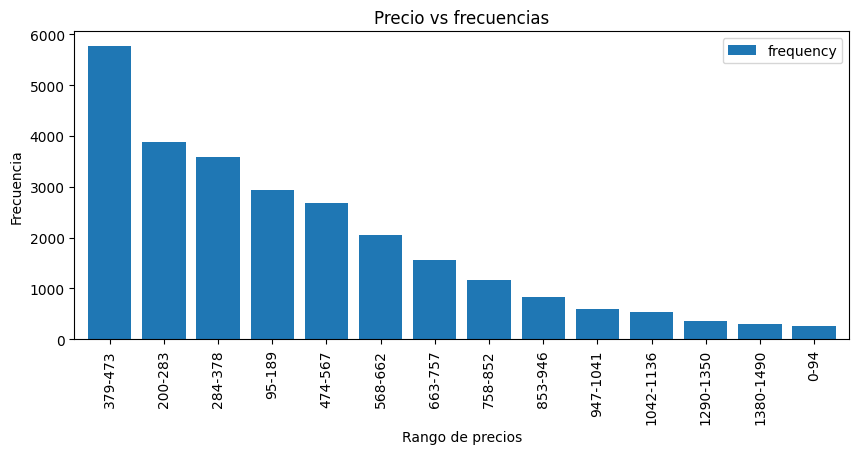

In [99]:
#Realizamos grafico de barras del DF filtrado
Filtro_index.plot(kind='bar',width=0.8,figsize=(10,4))
plt.title('Precio vs frecuencias')
plt.xlabel('Rango de precios')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

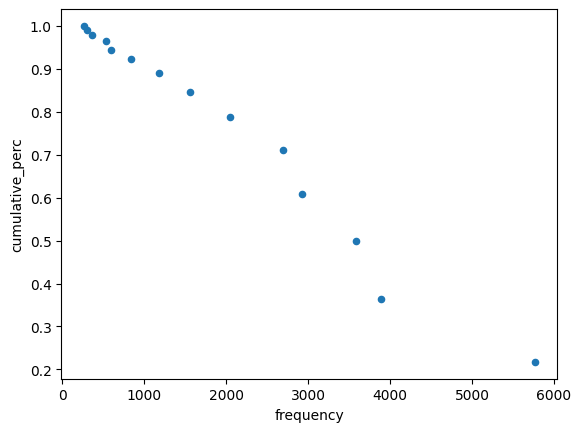

In [100]:
#Realizamos grafico de dispercion del DF filtrado
table1.plot('frequency','cumulative_perc',kind='scatter')

<Axes: xlabel='price'>

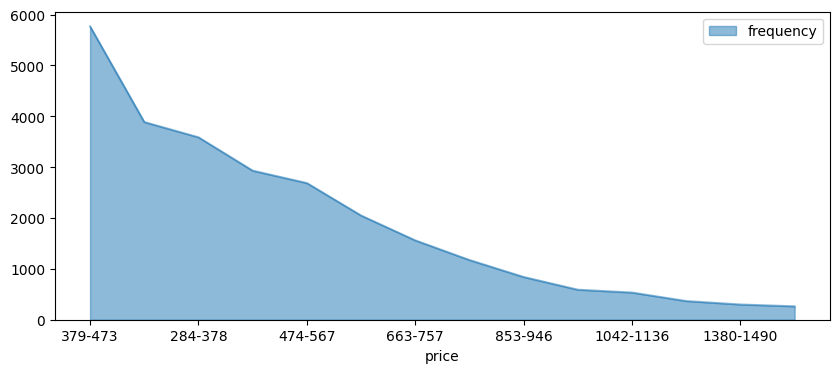

In [101]:
#Realoizamos grafico de area del DF filtrado
Filtro_index.plot(kind='area',figsize=(10,4),alpha=0.5)

<Axes: ylabel='frequency'>

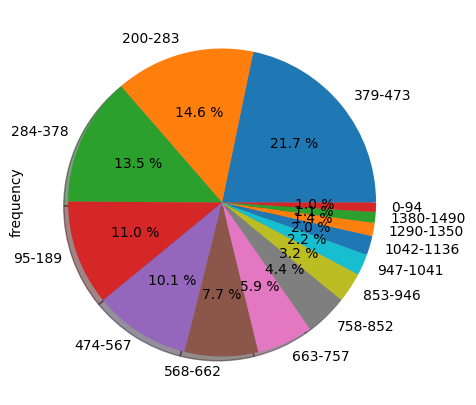

In [102]:
#Realizamos grafico de pastel del DF filtrado
Filtro_index['frequency'].plot(kind='pie',figsize=(10,5),shadow=True,autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

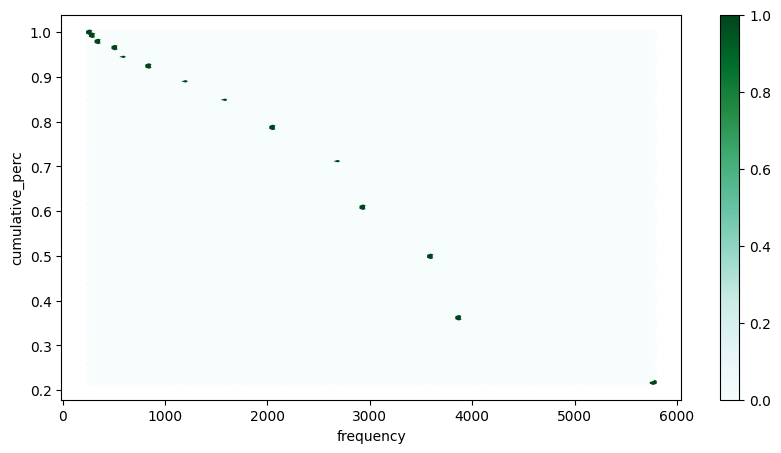

In [103]:
#Realizamos grafico hexagonal del DF filtrado, alternativo al scatter plot
table1.plot.hexbin('frequency','cumulative_perc',figsize=(10,5))

**modelo explicativo de variables númericas**

In [104]:
#Ajustar maximo de filas
pd.options.display.max_rows=None

In [105]:
#Corroboramos valores nulos
valores_nulos=categoricas.isnull().sum()
valores_nulos

,0
host_response_rate,0
host_acceptance_rate,0
host_total_listings_count,0
accommodates,0
bathrooms,0
beds,0
price,0
availability_60,0
availability_90,0
availability_365,0
